In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import umap
import glob

In [2]:
imagenes = []
numeros = []
total_imagenes = 0
for i in range(10):
    imagenes_leer = glob.glob('./Data/Dataset/{}/*.JPG'.format(i))
    for j in range(len(imagenes_leer)):
        if(plt.imread(imagenes_leer[j]).size == 30000):
            numeros.append(i)
            total_imagenes += 1
            imagenes.append(plt.imread(imagenes_leer[j]))
imagenes = np.array(imagenes)

In [3]:
X = imagenes.reshape((2059,-1))

In [4]:
def realizar_proceso(neighbors, min_dist,metric):
    reducer = umap.UMAP(n_neighbors=neighbors, min_dist = min_dist, metric = metric)
    reducer.fit(X)
    embedding = reducer.transform(X)
    Y = numeros
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title('U_map para neighbors = {}, min_dist = {} y metric = {}'.format(neighbors,min_dist,metric))
    n_clusters = 10
    k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
    k_means.fit(embedding) 
    cluster = k_means.predict(embedding) 
    distance = k_means.transform(embedding)
    plt.subplot(1,2,2)
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title('U_map con k-means para neighbors = {}, min_dist = {} y metric = {}'.format(neighbors,min_dist,metric))


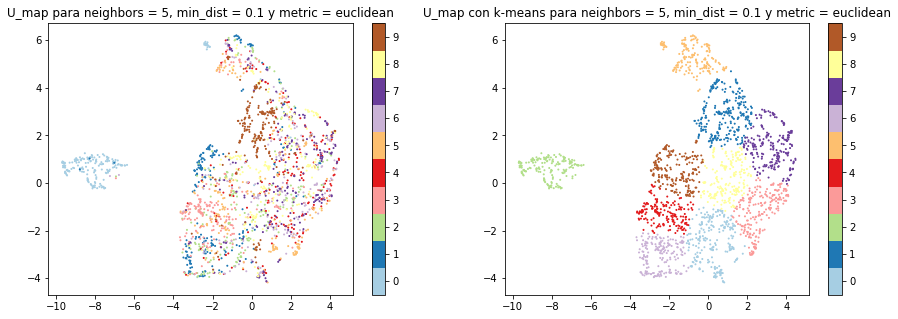

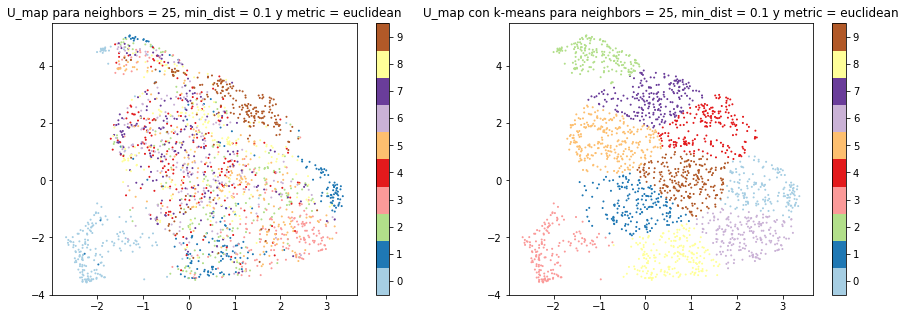

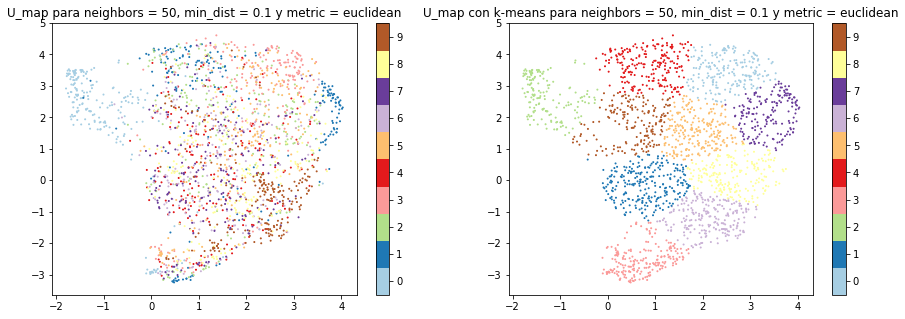

In [45]:
realizar_proceso(5,0.1,'euclidean')
realizar_proceso(25,0.1,'euclidean')
realizar_proceso(50,0.1,'euclidean')

Al variar el número de vecinos podemos ver que para valores bajos se produce una mejor agrupación que a comparación de valores altos de número de vecinos. En particular, para neighbors = 5 se produce una mejor segmentación que para neighbors = 50

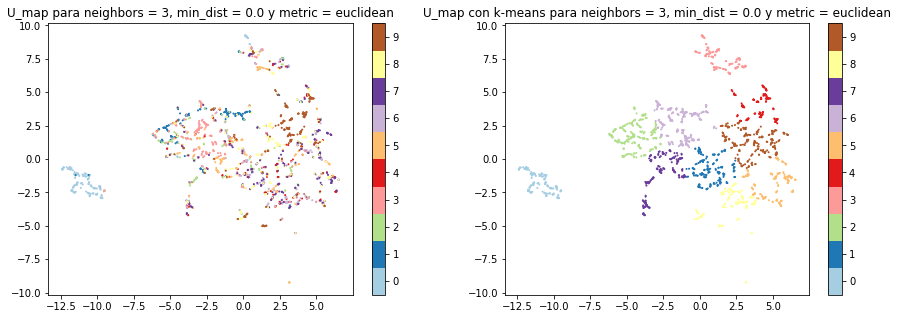

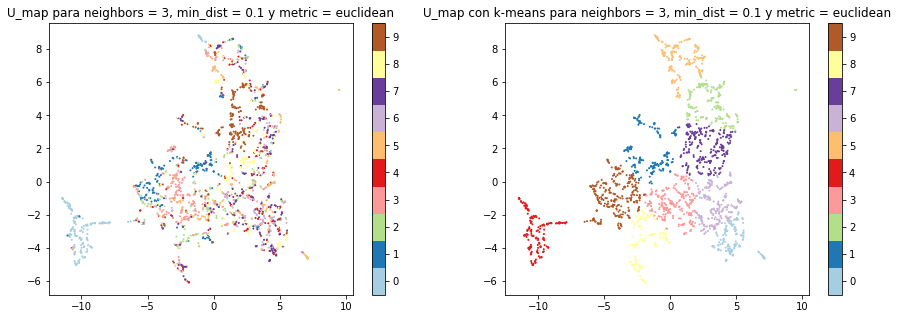

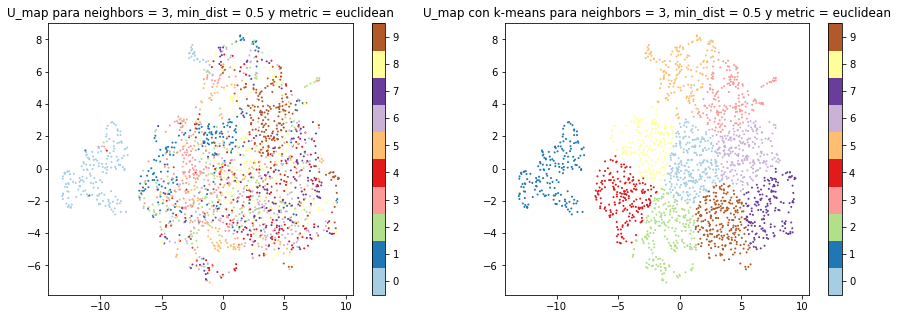

In [46]:
realizar_proceso(3,0.0,'euclidean')
realizar_proceso(3,0.1,'euclidean')
realizar_proceso(3,0.5,'euclidean')

Dejando fijo el número de vecinos y variando la distancia mínima se puede observar que para valores bajos de la misma se presentan estructuras más definidas que a comparación de valores mayores.

In [ ]:
realizar_proceso(5,0.0,'euclidean')
realizar_proceso(5,0.0,'cosine')
realizar_proceso(5,0.0,'minkowski')

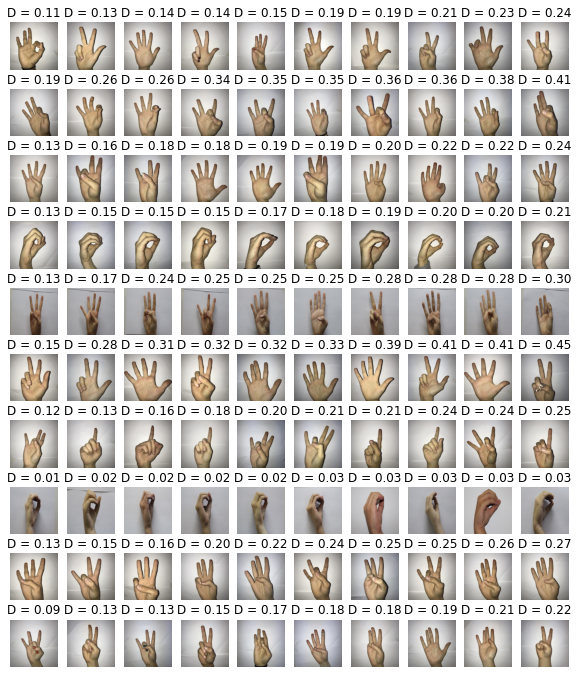

In [38]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i])
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(imagenes[ind])
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')